# 树模型 

id3使用信息增益最大   
c4.5使用信息增益率最大   详细见  
https://blog.csdn.net/qq_34807908/article/details/81539536   
cart 使用gini指数进行选择  详细见   
http://www.cnblogs.com/pinard/p/6053344.html   
scikitlearn 中的树模型用的是cart算法的改进  分类树是DecisionTreeClassifier   调参见   
https://www.cnblogs.com/pinard/p/6056319.html

## 1 数据导入

In [6]:
# from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target


In [7]:
X.shape

(150, 2)

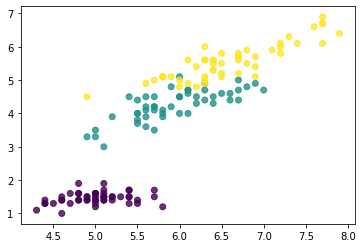

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

## 2分类树模型构建  sklearn分类树默认cart

In [9]:
# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
print("classes_",clf.classes_)
print("feature_importances_",clf.feature_importances_)
print("max_features_",clf.max_features_)
print("n_classes_",clf.n_classes_)
print("n_features_",clf.n_features_)
print("n_outputs_",clf.n_outputs_)
print("tree_",clf.tree_)

classes_ [0 1 2]
feature_importances_ [0.04476662 0.95523338]
max_features_ 2
n_classes_ 3
n_features_ 2
n_outputs_ 1
tree_ <sklearn.tree._tree.Tree object at 0x0000023ECA3F0EA0>


## 3 结果及分析

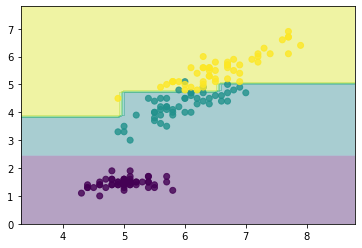

In [11]:
# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# 树模型的可视化
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'